### image restoration

## image reconstruction
-fixing damaged images
-text removing
-logo removing
-object removing

_inpainting_

reconstructing lost parts of images


In [1]:
def get_mask(defect_image):
    # Create a mask where True represents the areas to be inpainted
    # Example: let's say we're inpainting a central square region
    mask = np.zeros(defect_image.shape, dtype=bool)
    mask[30:70, 30:70] = True  # Example mask for a central square
    return mask

def show_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

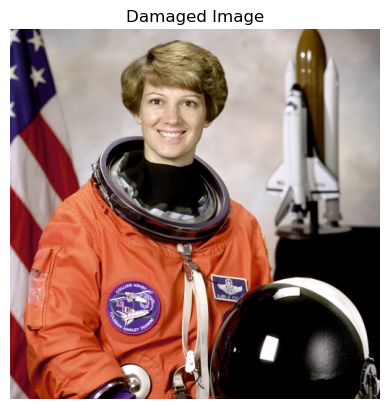

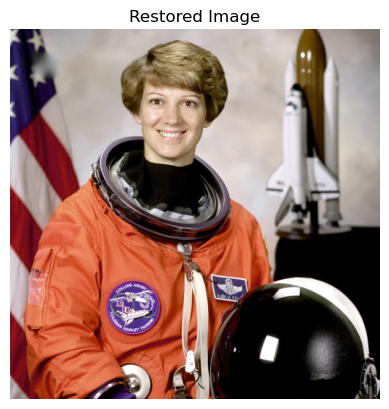

In [2]:
from skimage.restoration import inpaint
from skimage import data
import numpy as np
import matplotlib.pyplot as plt

#obtain the mask
defect_image = data.astronaut()
mask = get_mask(defect_image)

#apply inpainting to the damaged image using the mask 
restore_image = inpaint.inpaint_biharmonic(defect_image , mask )

show_image(defect_image, 'Damaged Image')
show_image(restore_image, 'Restored Image')

### noise


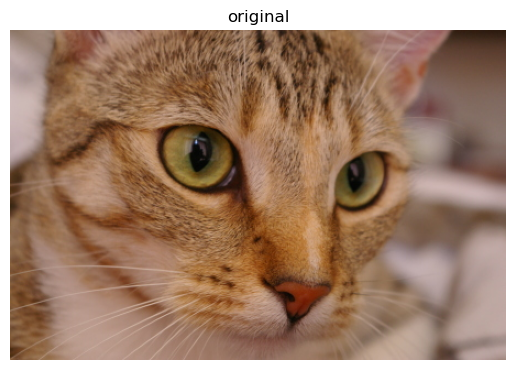

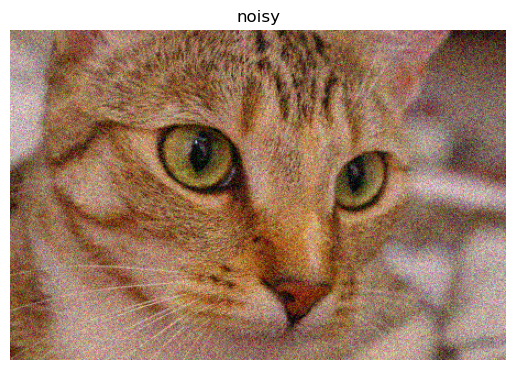

In [3]:
from skimage.util import random_noise
from skimage import data 
import matplotlib.pyplot as plt

dog_image = data.cat()

noisy_image = random_noise(dog_image)

show_image(dog_image , 'original')
show_image(noisy_image , 'noisy')

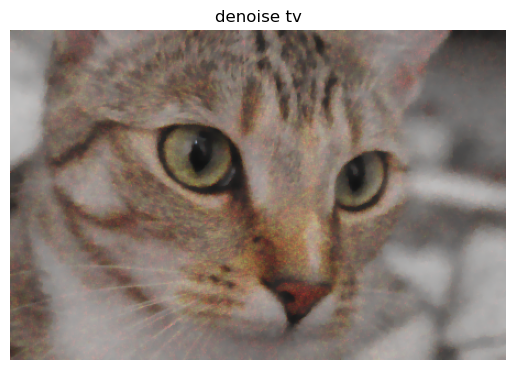

In [4]:
#denoise -total variation -bilateral -non-local means 
from skimage.restoration import denoise_tv_chambolle

# Apply Total Variation denoising
denoised_image = denoise_tv_chambolle(noisy_image, weight=0.1)
show_image(denoised_image , "denoise tv")


reducing noise while preserving edges (bilateral)

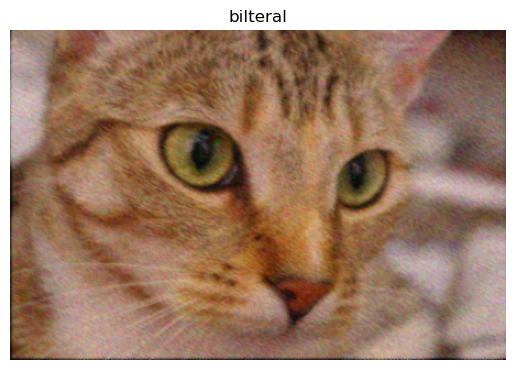

In [5]:
#bilateral filter\
from skimage.restoration import denoise_bilateral

denoised_image2 = denoise_bilateral(noisy_image , channel_axis =-1)
show_image(denoised_image2, 'bilteral')

### superpixels and segmantions

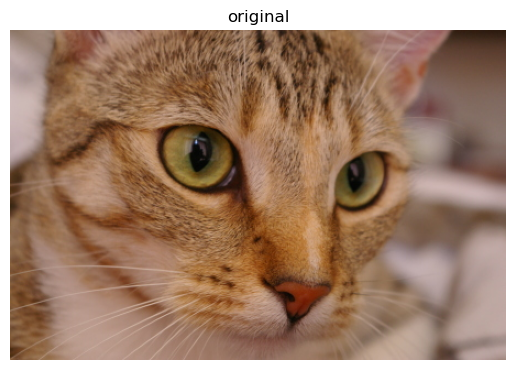

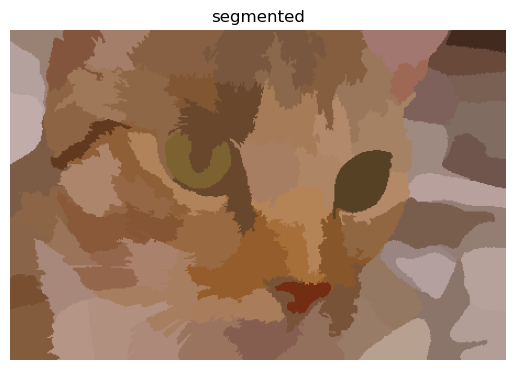

In [9]:
#segmented--> superpixels
#-more meaningful regions -computational efficiency 

#unsupervised segmentation (slic)
from skimage.segmentation import slic
from skimage.color import label2rgb

segments = slic(dog_image)

segmented_image = label2rgb(segments,dog_image , kind = 'avg')

show_image(dog_image ,'original')
show_image(segmented_image, 'segmented')



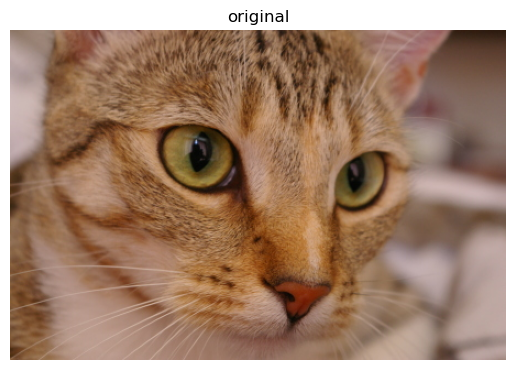

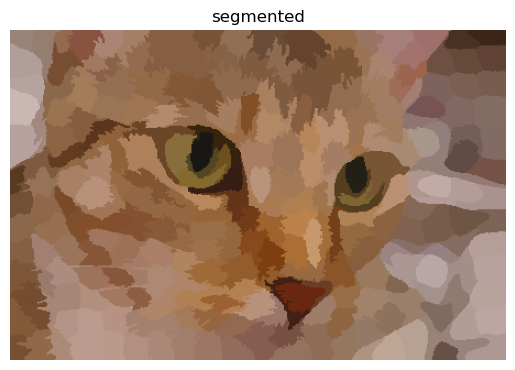

In [10]:
#obtain the segmention with 300 regions 

from skimage.segmentation import slic
from skimage.color import label2rgb

segments = slic(dog_image,n_segments=300)

segmented_image = label2rgb(segments,dog_image , kind = 'avg')

show_image(dog_image ,'original')
show_image(segmented_image, 'segmented')


### finding contours 

we can obtain a binary image applying thresholding or using edge detetion 


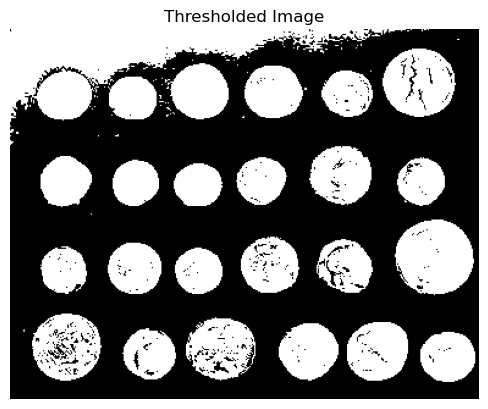

In [25]:
#preparing the image
#binarize the image
#obtain the thresh value

# we should use grayu scale image for 
from skimage.filters import threshold_otsu
from skimage import data
coin = data.coins()
thresh = threshold_otsu(coin)
#apply threshold
thresholded_image = coin > thresh
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()




In [30]:
#find countours
from skimage import measure
contours = measure.find_contours(thresholded_image, 0.8)



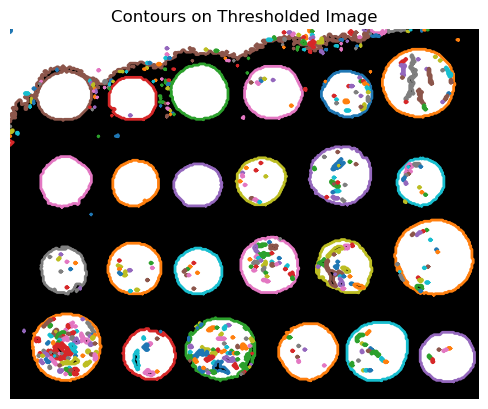

In [31]:
# Display the image and plot contours
plt.imshow(thresholded_image, cmap='gray')
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)

plt.title('Contours on Thresholded Image')
plt.axis('off')
plt.show()

In [32]:
for contour in contours :
    print(contour.shape)

(3, 2)
(5, 2)
(5, 2)
(13, 2)
(5, 2)
(1039, 2)
(29, 2)
(22, 2)
(7, 2)
(3, 2)
(5, 2)
(4, 2)
(3, 2)
(5, 2)
(7, 2)
(5, 2)
(9, 2)
(5, 2)
(5, 2)
(5, 2)
(19, 2)
(9, 2)
(7, 2)
(5, 2)
(11, 2)
(5, 2)
(5, 2)
(9, 2)
(17, 2)
(9, 2)
(9, 2)
(7, 2)
(13, 2)
(19, 2)
(5, 2)
(11, 2)
(5, 2)
(5, 2)
(7, 2)
(9, 2)
(5, 2)
(5, 2)
(11, 2)
(5, 2)
(5, 2)
(5, 2)
(7, 2)
(5, 2)
(5, 2)
(7, 2)
(7, 2)
(233, 2)
(7, 2)
(9, 2)
(13, 2)
(5, 2)
(5, 2)
(25, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(19, 2)
(5, 2)
(5, 2)
(9, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(7, 2)
(195, 2)
(5, 2)
(31, 2)
(9, 2)
(185, 2)
(97, 2)
(7, 2)
(27, 2)
(7, 2)
(7, 2)
(7, 2)
(7, 2)
(5, 2)
(33, 2)
(5, 2)
(5, 2)
(11, 2)
(5, 2)
(165, 2)
(5, 2)
(5, 2)
(153, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(7, 2)
(9, 2)
(5, 2)
(11, 2)
(7, 2)
(5, 2)
(9, 2)
(5, 2)
(9, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(7, 2)
(5, 2)
(9, 2)
(5, 2)
(11, 2)
(7, 2)
(9, 2)
(11, 2)
(5, 2)
(5, 2)
(7, 2)
(9, 2)
(5, 2)
(5, 2)
(9, 2)
(11, 2)
(5, 2)
(5, 2)
(5, 2)
(9, 2)
(9, 2)
(41, 2)
(5, 2)
(5, 2